In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import yellowbrick

print(f'Versión de pandas: {pd.__version__}')
print(f'Versión de numpy: {np.__version__}')
print(f'Versión de scikit-learn (sklearn): {sklearn.__version__}')
print(f'Versión de seaborn: {sns.__version__}')
print(f'Versión de yellowbrick: {yellowbrick.__version__}')


Versión de pandas: 2.3.1
Versión de numpy: 2.3.1
Versión de scikit-learn (sklearn): 1.7.1
Versión de seaborn: 0.13.2
Versión de yellowbrick: 1.5


In [2]:
datos = pd.read_csv('./data/flights.csv')
datos.shape

(71175, 11)

In [3]:
datos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [5]:
datos.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [6]:
datos.describe(include='O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


## **Finalidad del método Describe**

La Estadística Descriptiva es una rama de la Estadística que utiliza varias técnicas para describir y resumir un conjunto de datos. Es extremadamente útil en el análisis inicial de datos, proporcionando un resumen rápido y eficiente para los(as) investigadores(as). Uno de los métodos más utilizados en la estadística descriptiva es el describe().

En este sentido: ¿cuál es la finalidad principal del método describe en Pandas y qué estadísticas genera?

- Calcula estadísticas resumidas de los datos en un DataFrame, incluyendo: conteo, media, desviación estándar, mínimo, cuartiles y máximo.

    -   El método describe es una herramienta poderosa que proporciona estadísticas descriptivas de un conjunto de datos. Este método calcula varias estadísticas resumidas a la vez, incluyendo el conteo (número de elementos), media, desviación estándar (medida de dispersión de los datos), mínimo (el valor más bajo), los cuartiles (25%, 50% y 75% - correspondientes al primer cuartil, mediana y tercer cuartil, respectivamente) y el máximo (el valor más alto). Además, es posible obtener las estadísticas descriptivas para las variables categóricas: df.describe(include=['O']).

In [7]:
import matplotlib.pyplot as plt

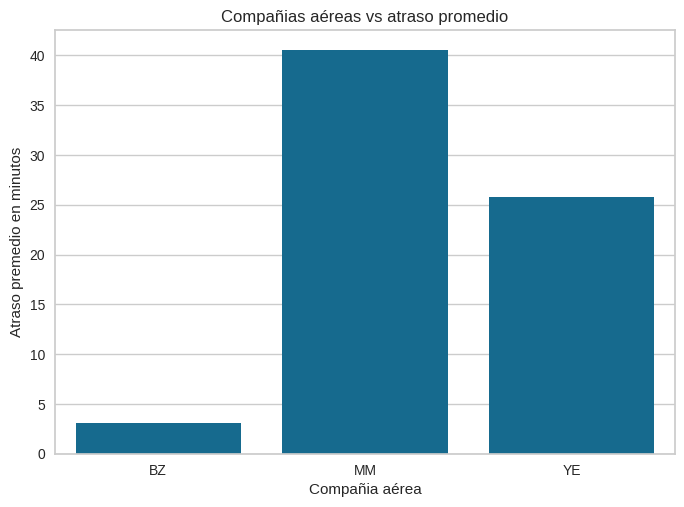

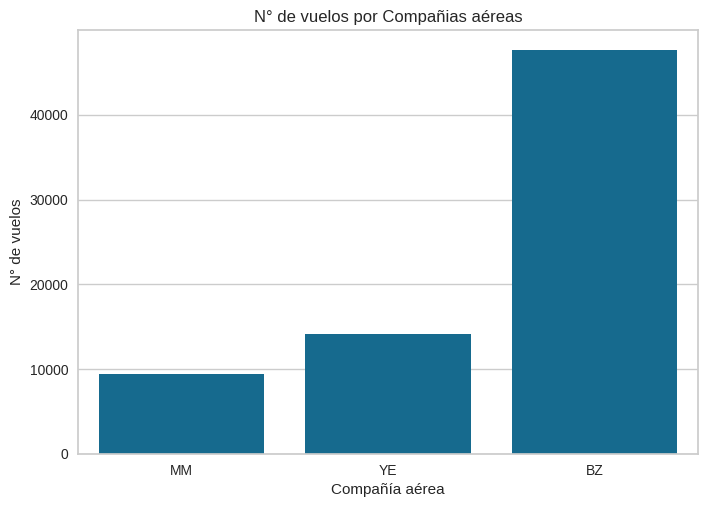

In [8]:
# veremos el promedio de retrasos en lso vuelos
avg_delay = datos.groupby('airline')['delay'].mean().reset_index()

#graficamos
sns.barplot(x='airline', y='delay', data=avg_delay)
plt.title('Compañias aéreas vs atraso promedio')
plt.xlabel('Compañia aérea')
plt.ylabel('Atraso premedio en minutos')
plt.show()


sns.countplot(data=datos, x='airline')
plt.title('N° de vuelos por Compañias aéreas')
plt.xlabel('Compañía aérea')
plt.ylabel('N° de vuelos')
plt.show()


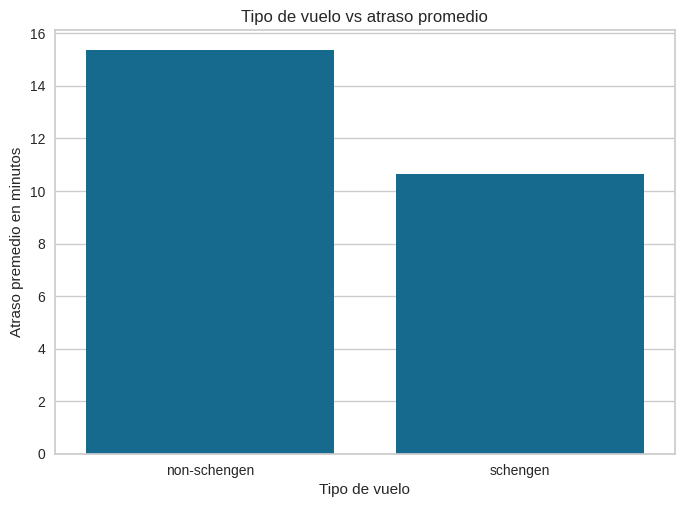

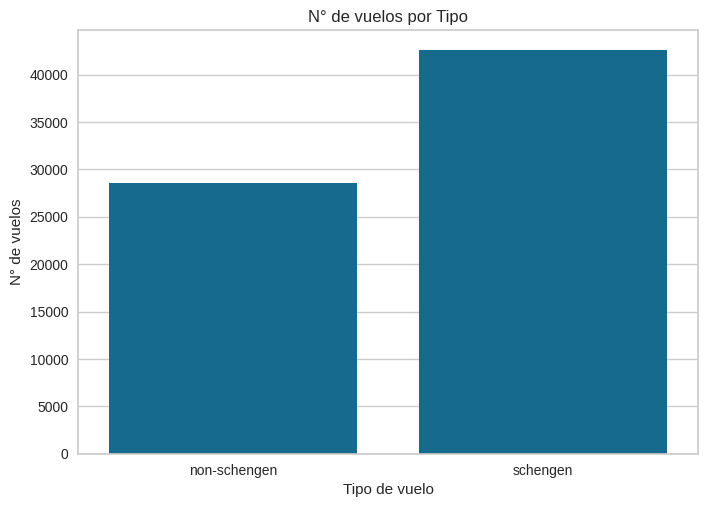

In [9]:
avg_delay = datos.groupby('schengen')['delay'].mean().reset_index()

#graficamos
sns.barplot(x='schengen', y='delay', data=avg_delay)
plt.title('Tipo de vuelo vs atraso promedio')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Atraso premedio en minutos')
plt.show()


sns.countplot(data=datos, x='schengen')
plt.title('N° de vuelos por Tipo')
plt.xlabel('Tipo de vuelo')
plt.ylabel('N° de vuelos')
plt.show()

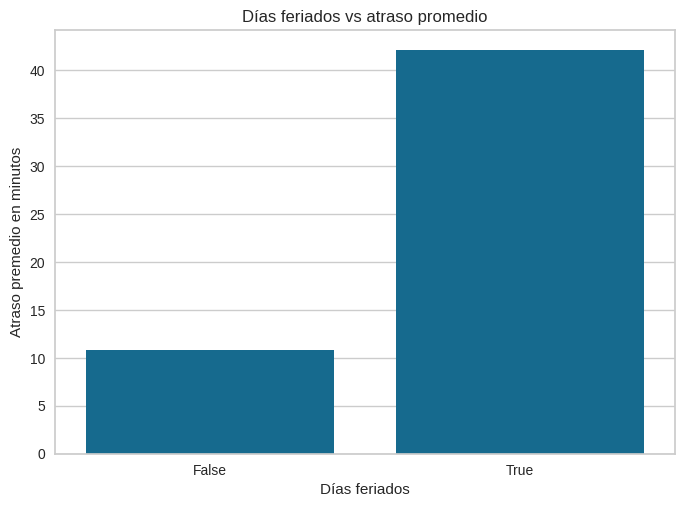

In [10]:
# revisaremos si es feriado o  no 

avg_delay = datos.groupby('is_holiday')['delay'].mean().reset_index()

#graficamos
sns.barplot(x='is_holiday', y='delay', data=avg_delay)
plt.title('Días feriados vs atraso promedio')
plt.xlabel('Días feriados')
plt.ylabel('Atraso premedio en minutos')
plt.show()

#

In [11]:
datos['aircraft_type'].value_counts().index
#'Airbus A320', 'Airbus A330', 'Boeing 787', 'Embraer E175','Boeing 737', 'Boeing 777'],

Index(['Airbus A320', 'Airbus A330', 'Boeing 787', 'Embraer E175',
       'Boeing 737', 'Boeing 777'],
      dtype='object', name='aircraft_type')

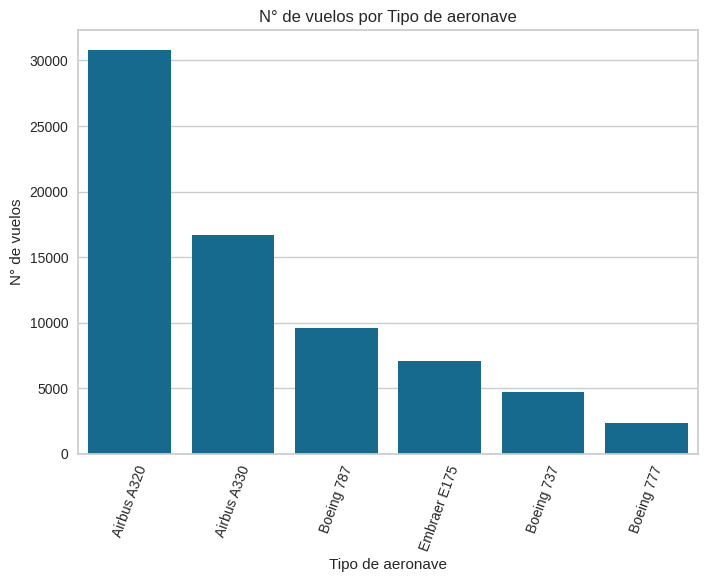

In [12]:
# revisaremos la cantidfad de aviones y tipos que pasan por el aeropuerto

order = datos['aircraft_type'].value_counts().index


sns.countplot(data=datos, x='aircraft_type', order=order)
plt.title('N° de vuelos por Tipo de aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo de aeronave')
plt.ylabel('N° de vuelos')
plt.show()

## **Para saber más: el Espacio Schengen**

El Espacio Schengen es un área geográfica que abarca la mayoría de los países europeos, donde se han eliminado los controles fronterizos para permitir la libre circulación de personas entre los países miembros. Esta área recibe su nombre en referencia al Acuerdo de Schengen, firmado en 1985 en la aldea de Schengen, en Luxemburgo, e implementado en 1995.

El acuerdo fue nombrado así por el lugar de la firma, pero el tratado Schengen en sí fue un desarrollo del Acuerdo de Schengen de 1990.

![img schengen](./data/Schengen.png)


Fuente: Mapa del Espacio Schengen en 2017.

Los países que forman parte del Espacio Schengen han abolido los controles fronterizos en las fronteras internas, lo que significa que no es necesario presentar un pasaporte o pasar por verificaciones de inmigración al viajar entre estos países. En las fronteras externas, sin embargo, es más riguroso y común, para garantizar la seguridad y el control de la inmigración.

Actualmente, la mayoría de los países de la Unión Europea (UE) forman parte del Espacio Schengen, junto con Noruega, Islandia, Suiza y Liechtenstein, que no son miembros de la UE. Sin embargo, es importante notar que no todos los países de la UE han adherido al Acuerdo de Schengen.

La libre circulación dentro del Espacio Schengen facilita los viajes y el comercio entre los países miembros, convirtiéndolo en una parte fundamental de la integración europea y un ejemplo de cooperación transfronteriza en cuestiones de seguridad e inmigración.


<Axes: xlabel='arrival_time', ylabel='Count'>

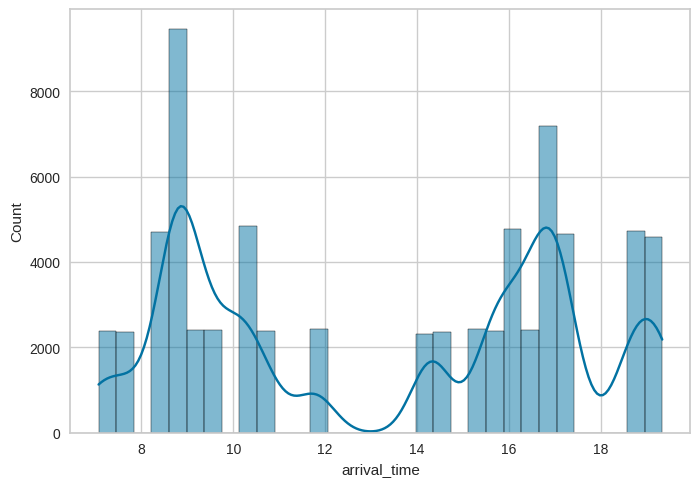

In [13]:
# Analisaremos lña feecuencia de los valores usando histograma (hoprario llegada, salida y atrasos en minutos)

sns.histplot(data=datos, x='arrival_time', kde=True)

[Fuente en Wikiopedia](https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule) 

In [14]:
# Formula de freeman & Diaconis

def ancho_bin(df, columna):
    q75,q25 = np.percentile(df[columna], [75,25])
    iqr = q75-q25
    ancho = 2 * iqr * np.power(len(df[columna]), -1/3)
    return ancho

<Axes: xlabel='arrival_time', ylabel='Count'>

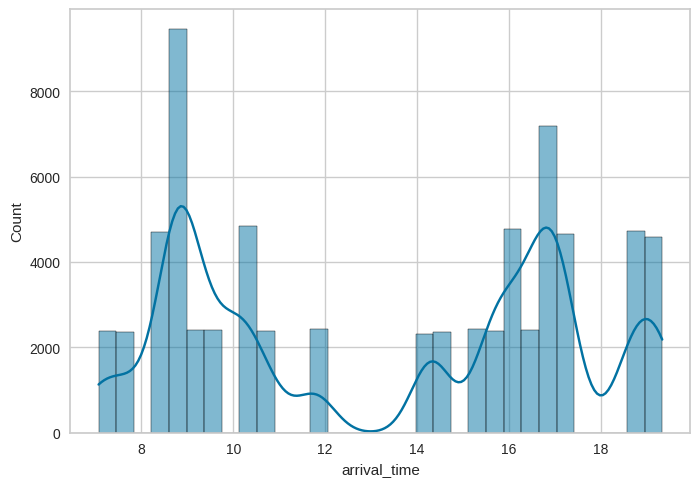

In [15]:
# Horario de llegada

binwidth = ancho_bin(datos,'arrival_time')
sns.histplot(data=datos, x='arrival_time', kde=True, binwidth=binwidth)

<Axes: xlabel='departure_time', ylabel='Count'>

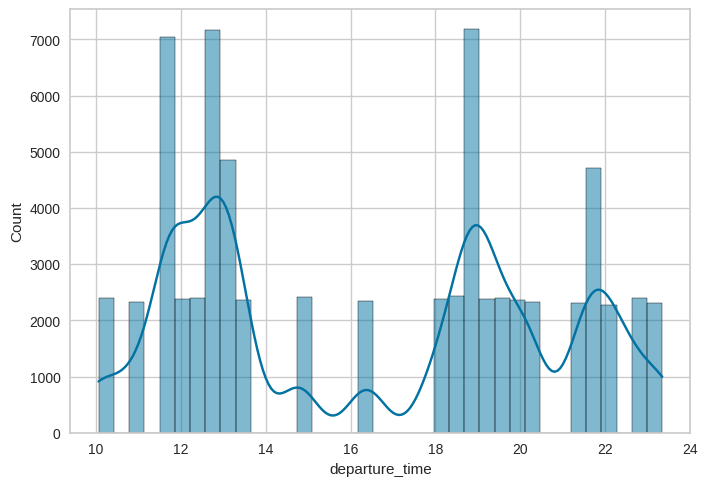

In [16]:
# horario de salida
binwidth = ancho_bin(datos,'departure_time')
sns.histplot(data=datos, x='departure_time', kde=True, binwidth=binwidth)

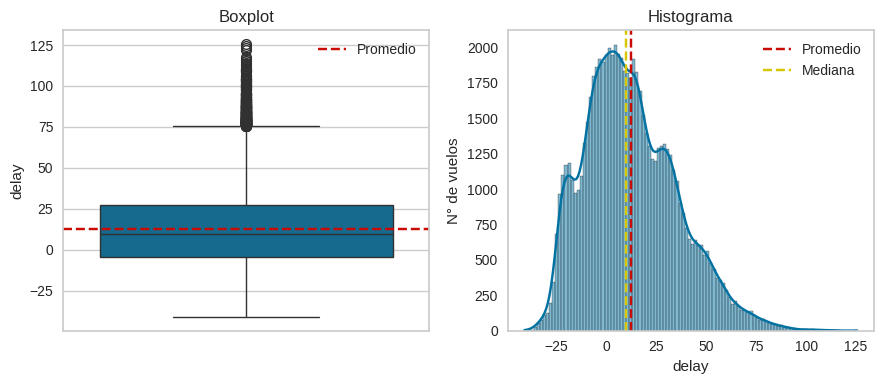

In [17]:
# Retraso promedio
atraso_promedio = datos['delay'].mean()
atraso_mediana = datos['delay'].median()

fig, ax = plt.subplots(1,2, figsize=(9,4))

sns.boxplot(data=datos, y='delay', ax=ax[0])
ax[0].set_title('Boxplot')
ax[0].axhline(y=atraso_promedio, color='r', linestyle='--', label='Promedio')
ax[0].legend()

binwidth = ancho_bin(datos, 'delay')
sns.histplot(data=datos, x='delay', ax=ax[1], kde=True, binwidth=binwidth)
plt.ylabel('N° de vuelos')
plt.grid(False)
ax[1].set_title('Histograma')
ax[1].axvline(x=atraso_promedio, color='r', linestyle='--', label='Promedio')
ax[1].axvline(x=atraso_mediana, color='y', linestyle='--', label='Mediana')
ax[1].legend()

plt.tight_layout()
plt.show()

## **Objetivo del boxplot**

El boxplot, también conocido como diagrama de caja, es una representación gráfica que nos permite visualizar la distribución de los datos de una forma más clara y objetiva. Está compuesto por: un rectángulo que representa la medianas y los cuartiles de los datos, además de líneas que se extienden hacia fuera del rectángulo, que muestran el rango de los datos, conforme a la imagen a continuación:

![img bloxplot](./data/boxsplot.png)

Donde:

- El límite inferior es el valor mínimo que un dato puede tener sin ser considerado un valor atípico (outlier). Se calcula como Q1 - 1,5 x IQR (donde IQR es el rango intercuartílico, es decir, la diferencia entre el tercer cuartil y el primer cuartil).
- El primer cuartil (Q1) es el valor que divide los datos en 25% por debajo y 75% por encima de él. Es decir, el 25% de los datos están por debajo del Q1 y el 75% están por encima.
- La mediana es el valor que divide los datos en 50% por debajo y 50% por encima de él.
- El tercer cuartil (Q3) es el valor que divide los datos en 75% por debajo y 25% por encima de él. Es decir, el 75% de los datos están por debajo del Q3 y el 25% están por encima.
- El límite superior es el valor máximo que un dato puede tener sin ser considerado un valor atípico. Se calcula como Q3 + 1,5 x IQR.

Ante esto, podemos decir que la finalidad del boxplot es:


- Visualizar la distribución de los datos e identificar posibles candidatos a outliers.

    - El boxplot se utiliza para visualizar la distribución de los datos e identificar posibles outliers. Muestra los cuartiles (Q1, Q2 y Q3), la mediana (Q2), además de indicar la presencia de valores extremos o discrepantes.

## **Clase 2**

datos

In [18]:
datos.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

In [24]:
datos['date'] = datos['year'].astype(str) + '-' + (datos['day'] + 1).astype(str)
datos['date'] = pd.to_datetime(datos['date'], format='%Y-%j')
datos.tail(2)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844,2022-12-31
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648,2022-12-31


In [26]:
# crearemos una columna que nos permita determinar si es fin de semana o no 

datos['is_weekend'] = datos['date'].dt.weekday.isin([5,6])
datos['day_name'] = datos['date'].dt.day_name()
datos.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
16493,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,4,2013,False,14.533383,2013-01-05,True,Saturday
32518,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,342,2015,False,3.260782,2015-12-09,False,Wednesday
18803,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,158,2013,False,27.257419,2013-06-08,True,Saturday
37342,14,BZ,Airbus A330,schengen,ZQO,7.708301,11.708301,299,2016,False,-5.631822,2016-10-26,False,Wednesday
35610,23,YE,Embraer E175,schengen,TCY,18.801235,21.801235,184,2016,False,6.353155,2016-07-03,True,Sunday


## **Para saber más: ¿qué es el feature engineering?**

El feature engineering es un concepto fundamental en el campo de la ciencia de datos y el aprendizaje automático, y desempeña un papel crucial en el proceso de desarrollo de modelos predictivos y analíticos. Esta técnica implica la creación, transformación y selección de variables, también conocidas como "features", a partir de los datos brutos disponibles, con el fin de mejorar el rendimiento de los modelos. Pero, ¿qué serían features?

**¿Qué son las features?**

Las features son las variables o atributos que un modelo de machine learning utiliza para hacer predicciones o clasificaciones. Representan la información que el modelo tiene a su disposición para aprender patrones en los datos. Por ejemplo, si estamos construyendo un modelo para predecir el precio de una casa, las features pueden incluir el número de habitaciones, la superficie en metros cuadrados, la ubicación geográfica, la proximidad a escuelas, entre otras.

**La importancia del Feature Engineering:**

1. Mejora el rendimiento del modelo: Elegir las features correctas y transformarlas adecuadamente puede resultar en modelos más precisos y eficientes. Features bien diseñadas pueden capturar información relevante y eliminar ruido en los datos.

2. Reduce la dimensionalidad: En conjuntos de datos con muchas features, la dimensionalidad de los datos puede convertirse en un problema. El feature engineering puede ayudar a reducir la cantidad de features, manteniendo solo aquellas que son realmente informativas para el modelo.

**Técnicas de Feature Engineering:**

Existen varias técnicas de feature engineering, incluyendo:

1. Creación de features: Esto implica la creación de nuevas features basadas en las existentes. Por ejemplo, combinar las features de superficie y valor de una propiedad para crear una feature que represente el valor por metro cuadrado de esa propiedad. O, si tienes datos de fecha y hora, puedes crear una nueva característica que represente el día de la semana. Esto puede ser útil porque tal vez haya patrones que ocurren en días específicos de la semana.

2. Transformación de features: Se pueden aplicar funciones matemáticas a las features existentes para hacerlas más adecuadas para el modelo. Ejemplos incluyen aplicar logaritmos o escalar valores para reducir la escala en la que se encuentra la variable.

3. Selección de features: No todas las features son igualmente importantes. La selección de features implica identificar y mantener solo las más relevantes para el problema en cuestión.

## **Feature engineering y su importancia**

En el área de ciencia de datos y aprendizaje automático, un concepto fundamental es la "Feature engineering" (Feature Engineering). Esta técnica desempeña un papel crucial en el desarrollo de modelos predictivos y analíticos, permitiendo que los científicos de datos extraigan información valiosa de los datos. En este sentido, ¿qué es la Feature engineering y por qué es importante?


La Feature engineering implica la creación, transformación y selección de variables a partir de datos en bruto.

La Feature engineering es un proceso que implica la creación, transformación y selección de variables a partir de datos en bruto. El objetivo es mejorar la precisión del modelo, proporcionando información más significativa y relevante.

In [27]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight_id       71175 non-null  int64         
 1   airline         71175 non-null  object        
 2   aircraft_type   71175 non-null  object        
 3   schengen        71175 non-null  object        
 4   origin          71175 non-null  object        
 5   arrival_time    71175 non-null  float64       
 6   departure_time  71175 non-null  float64       
 7   day             71175 non-null  int64         
 8   year            71175 non-null  int64         
 9   is_holiday      71175 non-null  bool          
 10  delay           71175 non-null  float64       
 11  date            71175 non-null  datetime64[ns]
 12  is_weekend      71175 non-null  bool          
 13  day_name        71175 non-null  object        
dtypes: bool(2), datetime64[ns](1), float64(3), int64(3), o

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
## 

datos['schengen'] = datos['schengen'].replace({'non-schengen':0, 'schengen':1})
datos['is_holiday'] = datos['is_holiday'].replace({False:0, True:1})
datos['is_weekend'] = datos['is_weekend'].replace({False:0, True:1})
datos.sample(3)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
41509,29,BZ,Boeing 737,1,ZQO,8.591208,11.591208,212,2017,0,17.161675,2017-08-01,0,Tuesday
59598,16,MM,Airbus A320,0,CSF,17.041281,20.041281,323,2020,0,42.403753,2020-11-19,0,Thursday
54382,2,BZ,Airbus A320,1,ZQO,19.196804,22.196804,340,2019,0,-0.380341,2019-12-07,1,Saturday


In [34]:
categoricas= ['airline', 'aircraft_type', 'origin', 'day_name']
pd.get_dummies(data=datos, columns=categoricas, dtype=int).head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


In [36]:
datos_codificados = pd.get_dummies(data=datos, columns=categoricas, dtype=int)
datos_codificados.sample(5)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
28435,24,1,9.668655,12.668655,70,2015,0,32.031574,2015-03-12,0,...,0,0,0,0,0,0,0,1,0,0
19949,13,0,10.172731,13.172731,234,2013,0,-13.596309,2013-08-23,0,...,1,0,0,1,0,0,0,0,0,0
56659,26,0,8.885071,10.885071,127,2020,0,21.793164,2020-05-07,0,...,1,0,0,0,0,0,0,1,0,0
53686,28,0,15.967963,17.967963,294,2019,0,8.209214,2019-10-22,0,...,0,0,0,0,0,0,0,0,1,0
16804,19,1,16.245220,19.245220,25,2013,0,34.564254,2013-01-26,1,...,0,1,0,0,0,1,0,0,0,0


In [37]:
# crearemos  un mapa de correlacion

datos[['arrival_time','departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


In [38]:
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   flight_id                   71175 non-null  int64         
 1   schengen                    71175 non-null  int64         
 2   arrival_time                71175 non-null  float64       
 3   departure_time              71175 non-null  float64       
 4   day                         71175 non-null  int64         
 5   year                        71175 non-null  int64         
 6   is_holiday                  71175 non-null  int64         
 7   delay                       71175 non-null  float64       
 8   date                        71175 non-null  datetime64[ns]
 9   is_weekend                  71175 non-null  int64         
 10  airline_BZ                  71175 non-null  int64         
 11  airline_MM                  71175 non-null  int64     

In [39]:
df = datos_codificados.drop(columns=['flight_id', 'departure_time', 'day', 'year', 'date'])
df.sample(10)


,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
50484,1,7.708301,0,-2.714734,0,1,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
21870,1,8.564949,0,36.524152,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
69612,1,8.923441,0,-9.971119,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
17284,1,8.564949,0,17.735473,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
48805,0,8.939996,0,31.327433,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0
30924,1,17.033688,0,-1.130926,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
55525,1,8.564949,0,12.384766,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
66248,1,11.781391,0,-16.144404,1,1,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
67088,1,18.801235,0,2.084440,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
30676,1,16.245220,0,32.853442,1,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,0


## **ejercicio**

### **Manos a la obra: ¿cómo utilizar el OneHotEncoder de Sklearn?**

Existen algunas formas de realizar la codificación dummy de las variables que son categóricas. Dos de ellas son usando el método get_dummies de la biblioteca Pandas y el OneHotEncoder de la biblioteca sklearn. Durante el curso, optamos por el primer enfoque. Según el código a continuación:

```python
categorical_vars = ['airline', 'aircraft_type', 'origin', 'day_of_week']
df_encoded = pd.get_dummies(df, columns=categorical_vars, dtype=int)
df_encoded.head()
```
¡Ahora es el momento de poner en práctica otro enfoque!

Aplica la codificación dummy en el código de la clase utilizando el OneHotEncoder de Scikit-Learn en lugar del get_dummies de la biblioteca pandas.

